In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import gensim
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from spellchecker import SpellChecker

import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)

In [3]:
df_tweet_en = pd.read_pickle('../data/final/NotIot_EN_tweets.p')
df_tweet_en

,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
ID,,,,,,,,,,,,
2017-En-20421,Now #India is #afraid of #bad .,0,0,0,1,0,0,0,0,0,0,0
2017-En-11490,He's seriously so frustrating sometimes! (╯°□°）╯︵ ┻━┻ #ugh #raging,1,0,1,0,0,0,0,0,1,0,0
2017-En-21004,How in the world did Nicole beat Paul?!?! #terrible #bb18 #BBFinale What was the jury thinking?? 😳😳😳,1,0,1,0,0,0,0,0,0,0,0
2017-En-11411,"Yeah, no. I don' mind tweetin' that twice. #snap #blm #likeThat",1,0,1,0,1,0,0,0,0,0,0
2017-En-21007,What's the most important thing you need to accomplish today? #onlinemarketing #solopreneur #start up #success,0,0,0,0,1,0,1,0,0,0,0
2017-En-21331,like srsly somebody help me deal with this social anxiety,0,0,0,1,0,0,0,0,0,0,0
2017-En-10886,@isthataspider @dhodgs i will fight this guy! Don't insult the lions like that! But seriously they kinda are.Wasted some of the best players,1,0,1,0,0,0,0,1,0,0,0
2017-En-20965,"Don't let fear hold you back from being who you want to be. Use it's power to push you towards your goals. No more fear, just action. #fear",0,0,0,1,0,0,1,0,0,0,0
2017-En-31134,Good morning.Let's start with a smile!\nLet's enjoy life in a cheerful way!\nDon't worry be happy!,0,1,0,0,1,0,1,0,0,0,1


In [34]:
new_df_tweet_en = pd.DataFrame(columns=['text', 'emotion'])
for row in df_tweet_en.itertuples(index=False):
    column_name  = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
    for i in range (1,len(row)-1): 
        if row[i] == 1:
            emotion = column_name[i-1]
            text = row.Tweet
            new_df_tweet_en = new_df_tweet_en.append({'text' : text , 'emotion' : emotion} , ignore_index=True)
            break
new_df_tweet_en

,text,emotion
0,Now #India is #afraid of #bad .,fear
1,He's seriously so frustrating sometimes! (╯°□°）╯︵ ┻━┻ #ugh #raging,anger
2,How in the world did Nicole beat Paul?!?! #terrible #bb18 #BBFinale What was the jury thinking?? 😳😳😳,anger
3,"Yeah, no. I don' mind tweetin' that twice. #snap #blm #likeThat",anger
4,What's the most important thing you need to accomplish today? #onlinemarketing #solopreneur #start up #success,joy
5,like srsly somebody help me deal with this social anxiety,fear
6,@isthataspider @dhodgs i will fight this guy! Don't insult the lions like that! But seriously they kinda are.Wasted some of the best players,anger
7,"Don't let fear hold you back from being who you want to be. Use it's power to push you towards your goals. No more fear, just action. #fear",fear
8,Good morning.Let's start with a smile!\nLet's enjoy life in a cheerful way!\nDon't worry be happy!,anticipation
9,@R1Breakfast Totes had to re-listen to the endless hilarity that was Tom Odell's 'raaar' this morning 😂😂😂 @grimmers @fionaradio @TinaDaheley,joy


In [35]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    def space_uderscore(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_',' ')
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(self.space_uderscore).apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [36]:
textcount = TextCounts()
df_eda = textcount.fit_transform(new_df_tweet_en.text)
# Add airline_sentiment to df_eda
df_eda['sentiment'] = new_df_tweet_en.emotion
df_eda['origin_text'] = new_df_tweet_en.text


In [37]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='sentiment', size=5, hue='sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Descriptive stats for count_words
---------------------------------
               count       mean       std  min    25%   50%    75%   max
sentiment                                                               
anger         2859.0  17.195873  6.794708  1.0  12.00  18.0  23.00  35.0
anticipation  913.0   16.639650  6.598149  3.0  11.00  17.0  22.00  32.0
disgust       507.0   16.364892  6.977872  2.0  11.00  16.0  22.00  33.0
fear          629.0   16.166932  7.133784  2.0  10.00  17.0  22.00  33.0
joy           1938.0  15.963880  6.844594  2.0  10.00  16.0  21.75  36.0
love          34.0    19.735294  7.059525  5.0  14.75  22.0  25.00  28.0
optimism      193.0   18.523316  6.271689  4.0  14.00  19.0  24.00  32.0
pessimism     213.0   15.591549  7.286413  1.0  9.00   16.0  22.00  30.0
sadness       203.0   15.295567  7.576104  1.0  9.00   15.0  22.00  33.0
surprise      17.0    14.000000  4.795832  7.0  10.00  14.0  17.00  22.0


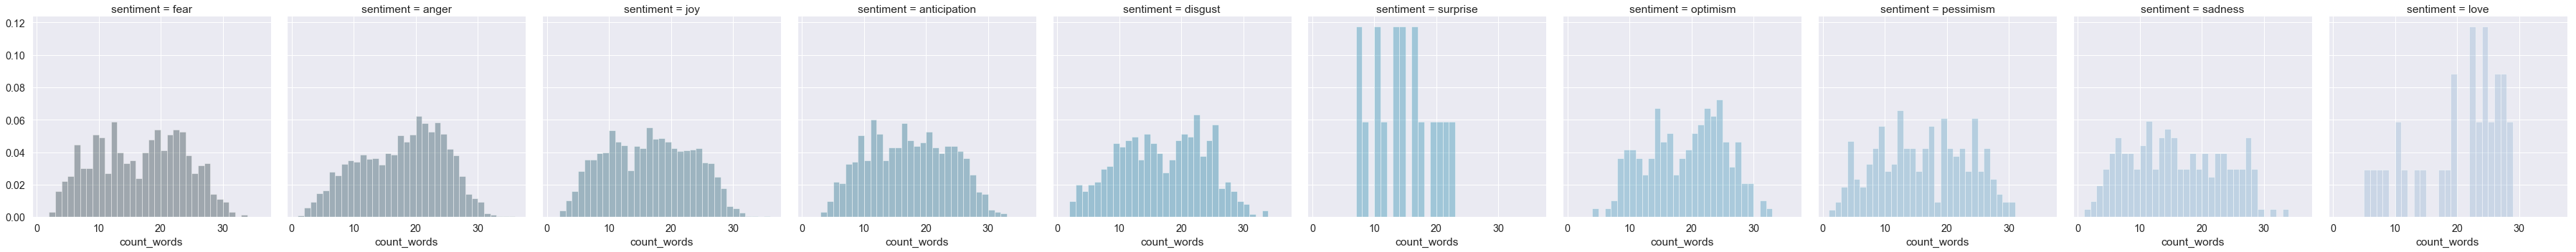

In [38]:
show_dist(df_eda, 'count_words')

Descriptive stats for count_mentions
------------------------------------
               count      mean       std  min  25%  50%  75%  max
sentiment                                                        
anger         2859.0  0.704092  0.922782  0.0  0.0  0.0  1.0  9.0
anticipation  913.0   0.595838  0.867205  0.0  0.0  0.0  1.0  6.0
disgust       507.0   0.656805  0.898268  0.0  0.0  0.0  1.0  6.0
fear          629.0   0.445151  0.828779  0.0  0.0  0.0  1.0  6.0
joy           1938.0  0.608875  0.864467  0.0  0.0  0.0  1.0  8.0
love          34.0    0.470588  0.748141  0.0  0.0  0.0  1.0  3.0
optimism      193.0   0.383420  0.659967  0.0  0.0  0.0  1.0  4.0
pessimism     213.0   0.403756  0.711353  0.0  0.0  0.0  1.0  4.0
sadness       203.0   0.507389  0.726918  0.0  0.0  0.0  1.0  5.0
surprise      17.0    0.529412  0.717430  0.0  0.0  0.0  1.0  2.0


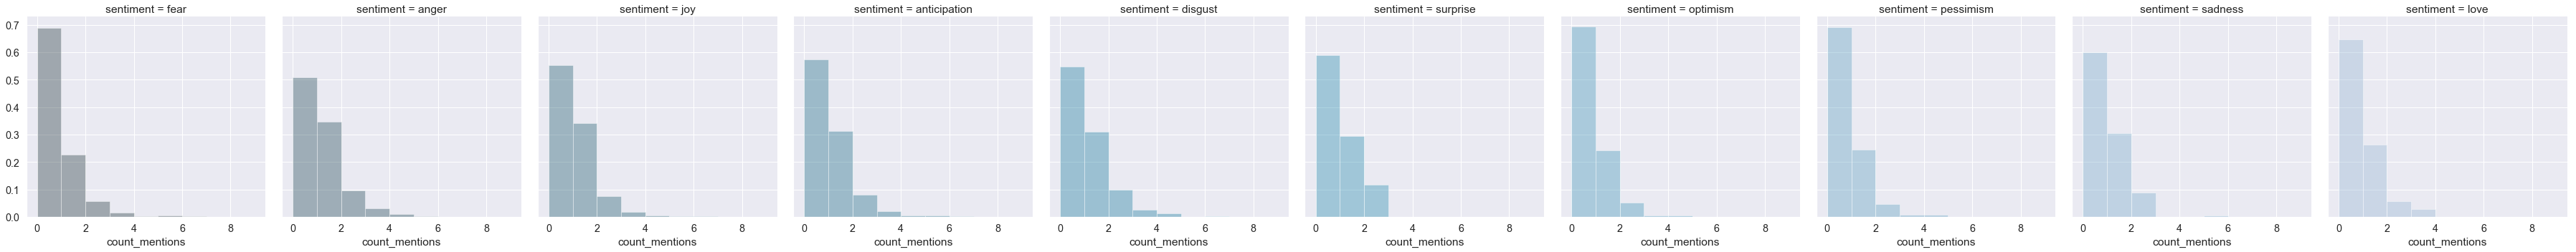

In [39]:
show_dist(df_eda, 'count_mentions')

Descriptive stats for count_hashtags
------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.981462  1.650330  0.0  0.0  0.0  1.0  14.0
anticipation  913.0   1.190581  2.035011  0.0  0.0  0.0  2.0  15.0
disgust       507.0   0.968442  1.570161  0.0  0.0  0.0  1.0  12.0
fear          629.0   1.421304  2.005309  0.0  0.0  1.0  2.0  13.0
joy           1938.0  1.227554  1.994138  0.0  0.0  0.0  2.0  16.0
love          34.0    0.882353  1.950364  0.0  0.0  0.0  1.0  9.0 
optimism      193.0   1.160622  1.947248  0.0  0.0  0.0  2.0  9.0 
pessimism     213.0   0.934272  1.615199  0.0  0.0  0.0  1.0  11.0
sadness       203.0   0.793103  1.423478  0.0  0.0  0.0  1.0  11.0
surprise      17.0    0.764706  1.480262  0.0  0.0  0.0  1.0  6.0 


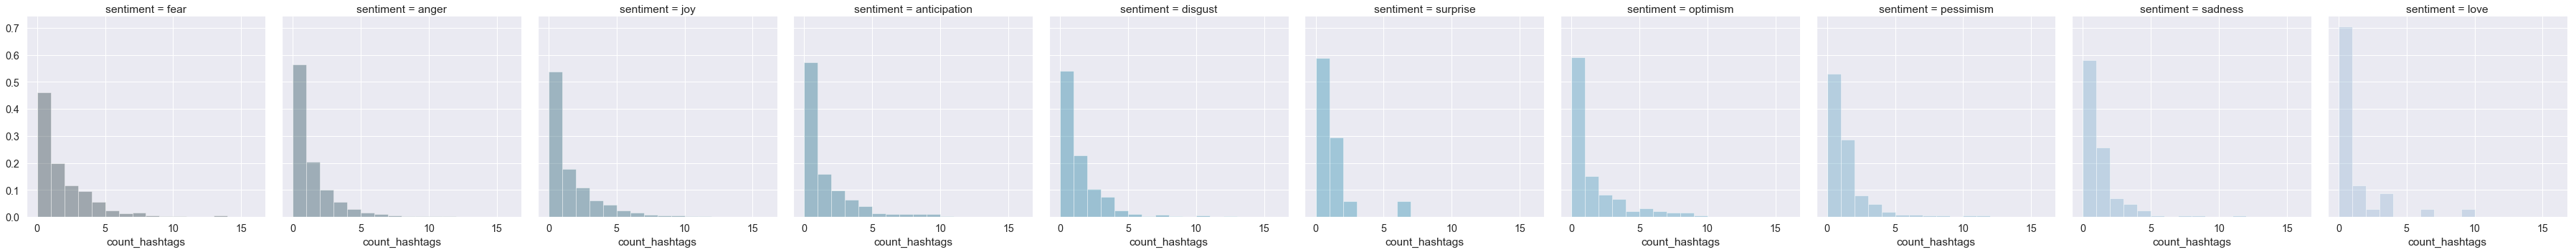

In [40]:
show_dist(df_eda, 'count_hashtags')

Descriptive stats for count_capital_words
-----------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.287163  1.038995  0.0  0.0  0.0  0.0  21.0
anticipation  913.0   0.243154  0.765211  0.0  0.0  0.0  0.0  11.0
disgust       507.0   0.163708  0.532375  0.0  0.0  0.0  0.0  6.0 
fear          629.0   0.166932  0.557908  0.0  0.0  0.0  0.0  6.0 
joy           1938.0  0.191434  0.709831  0.0  0.0  0.0  0.0  11.0
love          34.0    0.117647  0.409338  0.0  0.0  0.0  0.0  2.0 
optimism      193.0   0.160622  0.530432  0.0  0.0  0.0  0.0  3.0 
pessimism     213.0   0.103286  0.556809  0.0  0.0  0.0  0.0  7.0 
sadness       203.0   0.113300  0.400458  0.0  0.0  0.0  0.0  3.0 
surprise      17.0    0.176471  0.528594  0.0  0.0  0.0  0.0  2.0 


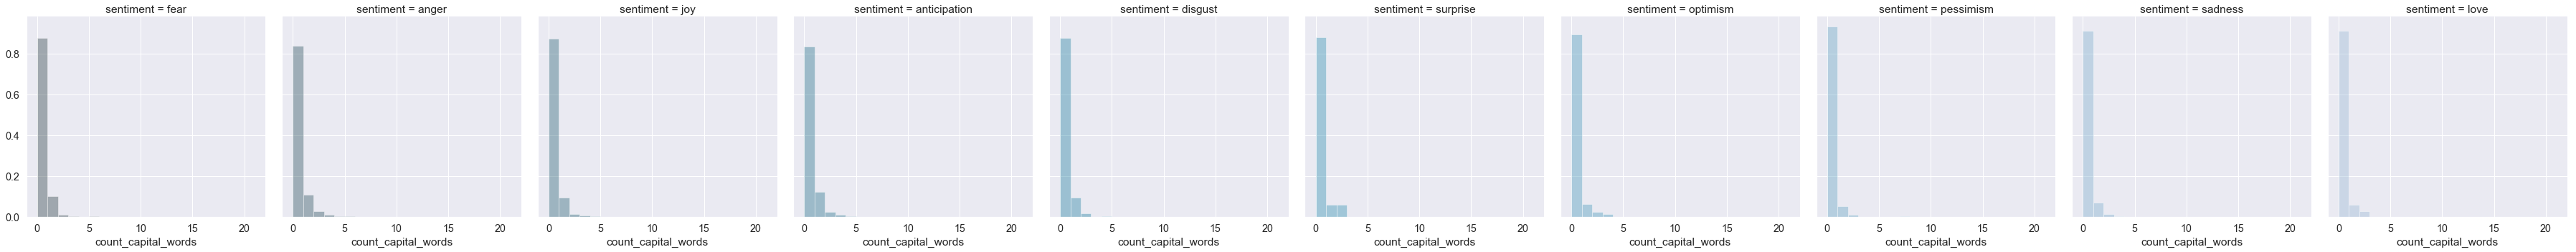

In [41]:
show_dist(df_eda, 'count_capital_words')

Descriptive stats for count_excl_quest_marks
--------------------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.427422  1.001694  0.0  0.0  0.0  0.0  12.0
anticipation  913.0   0.470975  0.978654  0.0  0.0  0.0  1.0  9.0 
disgust       507.0   0.289941  0.752307  0.0  0.0  0.0  0.0  7.0 
fear          629.0   0.375199  0.940468  0.0  0.0  0.0  0.0  7.0 
joy           1938.0  0.418989  0.944451  0.0  0.0  0.0  0.0  10.0
love          34.0    0.411765  0.891633  0.0  0.0  0.0  0.0  4.0 
optimism      193.0   0.202073  0.554899  0.0  0.0  0.0  0.0  4.0 
pessimism     213.0   0.295775  0.927479  0.0  0.0  0.0  0.0  7.0 
sadness       203.0   0.192118  0.586597  0.0  0.0  0.0  0.0  5.0 
surprise      17.0    0.294118  0.587868  0.0  0.0  0.0  0.0  2.0 


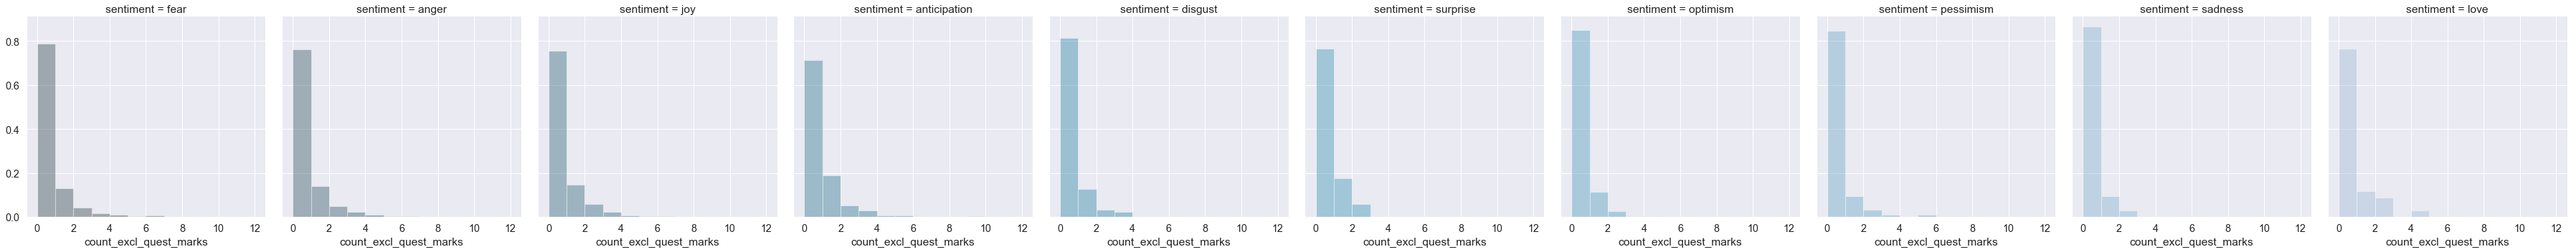

In [42]:
show_dist(df_eda, 'count_excl_quest_marks')

Descriptive stats for count_urls
--------------------------------
               count  mean  std  min  25%  50%  75%  max
sentiment                                               
anger         2859.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
anticipation  913.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
disgust       507.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
fear          629.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
joy           1938.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
love          34.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0
optimism      193.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
pessimism     213.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
sadness       203.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
surprise      17.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0


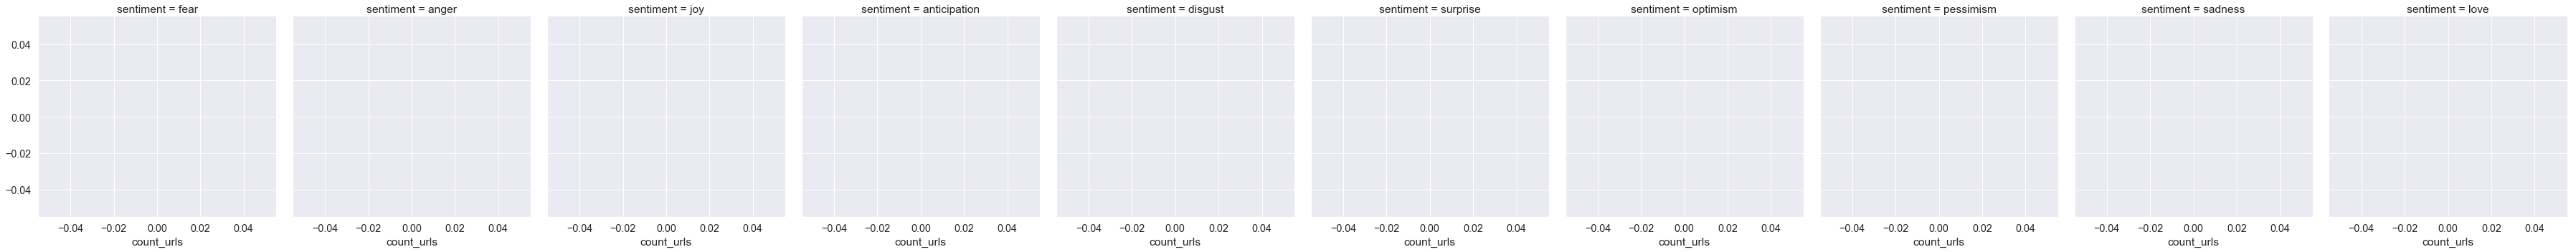

In [43]:
show_dist(df_eda, 'count_urls')

Descriptive stats for count_emojis
----------------------------------
               count      mean       std  min  25%  50%  75%   max
sentiment                                                         
anger         2859.0  0.199720  0.720819  0.0  0.0  0.0  0.0  10.0
anticipation  913.0   0.246440  2.480527  0.0  0.0  0.0  0.0  73.0
disgust       507.0   0.209073  0.932333  0.0  0.0  0.0  0.0  14.0
fear          629.0   0.193959  0.633885  0.0  0.0  0.0  0.0  5.0 
joy           1938.0  0.340041  1.008204  0.0  0.0  0.0  0.0  15.0
love          34.0    0.235294  0.889631  0.0  0.0  0.0  0.0  5.0 
optimism      193.0   0.082902  0.437045  0.0  0.0  0.0  0.0  4.0 
pessimism     213.0   0.248826  0.782510  0.0  0.0  0.0  0.0  6.0 
sadness       203.0   0.206897  0.728862  0.0  0.0  0.0  0.0  7.0 
surprise      17.0    0.411765  1.003670  0.0  0.0  0.0  0.0  3.0 


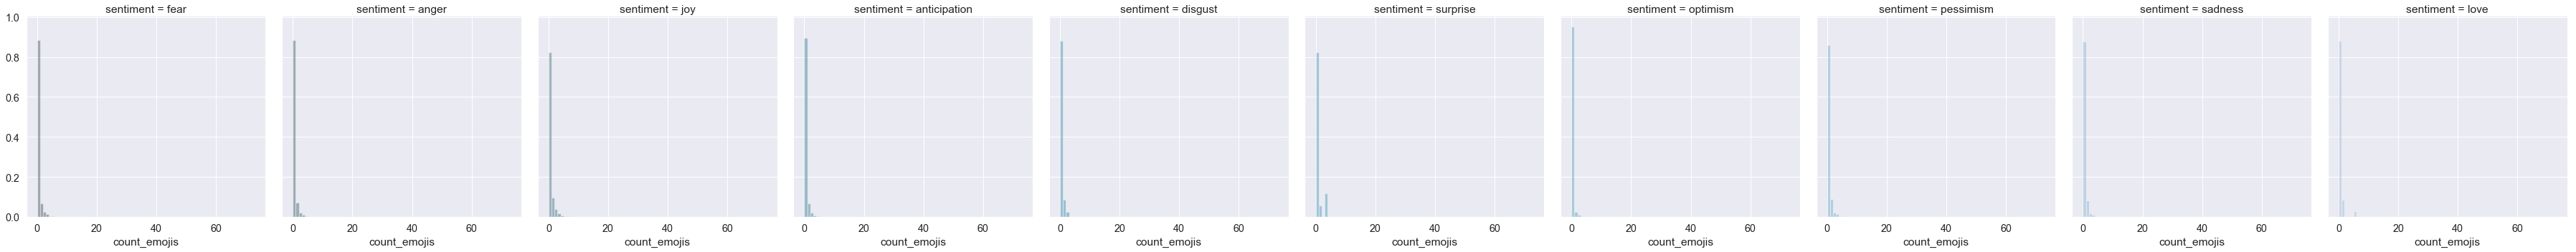

In [44]:
show_dist(df_eda, 'count_emojis')

In [46]:
class CleanText(BaseEstimator, TransformerMixin):
    
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    #def remove_hashtags(self, input_text):
        #return re.sub(r'#\w+', '', input_text)    
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def replace_acronyms(self, input_text):
        acronyms_dic = {"B4" : "before","BFN":"bye for now","BGD" : "background","BH":"blockhead","BR":"best regards",
                        "BTW" : "by the way","OMG":"oh my god"}
        acronyms_pattern = re.compile(r'\b(' + '|'.join(acronyms_dic.keys()) + r')\b')
        return acronyms_pattern.sub(lambda x: acronyms_dic[x.group()], input_text)
        
    def stopwords_spell(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        blacklist = ["via","rt"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and (word not in blacklist) and len(word) > 1] 
        #correct words
        #spell = SpellChecker()
        correct_words = [word for word in clean_words]
        return " ".join(correct_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.replace_acronyms).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.stopwords_spell)
        return clean_X

In [47]:
cleantext = CleanText()
sr_clean = cleantext.fit_transform(new_df_tweet_en.text)
sr_clean.sample(5)

7205    true sonicsatam serious bit dark aosth like super goofy looney toonie degree                 
6695    nervous wreck omg                                                                            
5668    depressing part ill taste goes                                                               
1970    doctor giving flower extract relieve anxiety reduce panic attacks                            
5502    simple get two shots espresso grande decaf degrees soy americano extra foam barista nightmare
Name: text, dtype: object

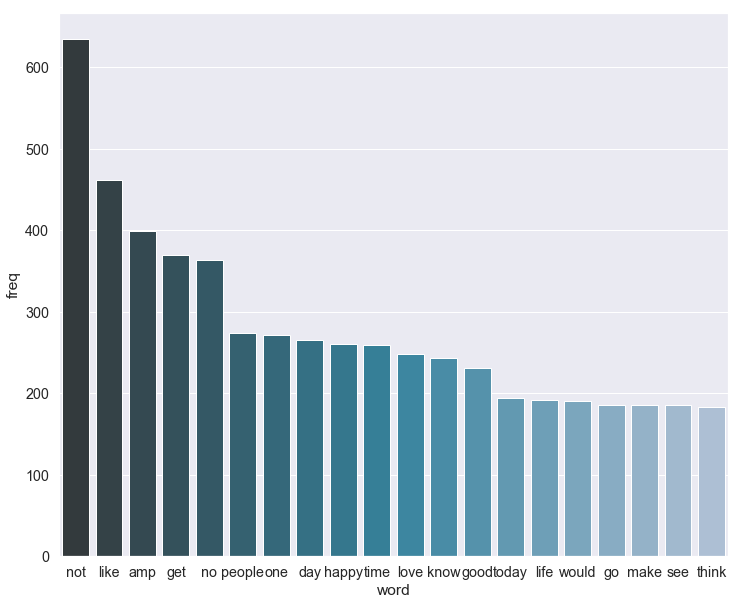

In [48]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

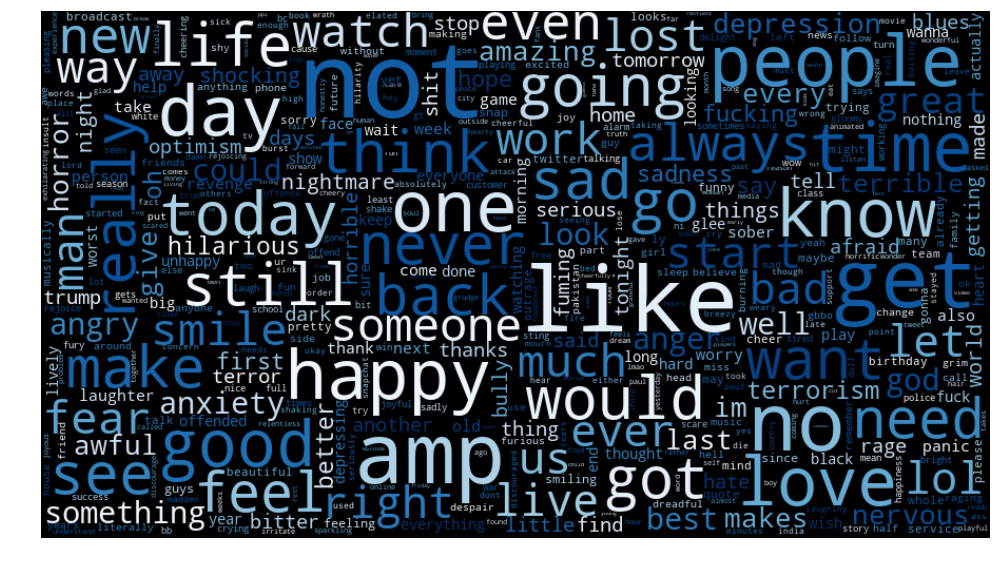

In [49]:
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(word_counter)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model = df_model.drop_duplicates('clean_text')

In [51]:
df_model.shape

(7432, 10)

In [52]:
df_model.info

<bound method DataFrame.info of       count_words  count_mentions  count_hashtags  count_capital_words  \
0     6            0               3               0                     
1     8            0               2               0                     
2     16           0               3               0                     
3     11           0               3               0                     
4     16           0               4               0                     
5     10           0               0               0                     
6     25           2               0               0                     
7     30           0               1               0                     
8     21           0               0               0                     
9     21           4               0               0                     
10    7            0               0               0                     
11    21           0               0               0                     
12    

In [53]:
df_model['clean_text'].replace('', np.nan, inplace=True)

In [54]:
df_model = df_model.dropna(axis=0, subset=['clean_text'])
df_model.head()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,sentiment,origin_text,clean_text
0,6,0,3,0,0,0,0,fear,Now #India is #afraid of #bad .,india afraid bad
1,8,0,2,0,1,0,0,anger,He's seriously so frustrating sometimes! (╯°□°）╯︵ ┻━┻ #ugh #raging,seriously frustrating sometimes ╯°□°）╯︵ ┻━┻ ugh raging
2,16,0,3,0,6,0,3,anger,How in the world did Nicole beat Paul?!?! #terrible #bb18 #BBFinale What was the jury thinking?? 😳😳😳,world nicole beat paul terrible bb bbfinale jury thinking 😳😳😳
3,11,0,3,0,0,0,0,anger,"Yeah, no. I don' mind tweetin' that twice. #snap #blm #likeThat",yeah no mind tweetin twice snap blm likethat
4,16,0,4,0,1,0,0,joy,What's the most important thing you need to accomplish today? #onlinemarketing #solopreneur #start up #success,important thing need accomplish today onlinemarketing solopreneur start success


In [55]:
df_model.to_pickle('../data/pickle_emotion/df_model_en_.p') # save dframe to pickle

In [33]:
positive_tweets = pd.Series(["My room is almost 100% fully automated. Almost every device can communicate with one another. I'm so in love. I love technology. #IoT"
                      ,"I love technology! The possibilities are endless. I can’t wait to publish my first paper! 👩🏽‍💻 #Software #computerscience #computationalthinking  #iot"
                      ,"Great question! I love the #aiot example from @VolvoTrucks - predicting maintenance issues using #IoT and #AI. (link: https://www.sas.com/en_us/customers/volvo-trucks-mack-trucks.html) sas.com/en_us/customer… "])

df_counts_pos = textcount.transform(positive_tweets)
df_clean_pos = cleantext.transform(positive_tweets)
df_model_pos = df_counts_pos
df_model_pos['clean_text'] = df_clean_pos
df_model_pos.to_pickle('df_model_pos.p')

In [38]:
negative_tweets = pd.Series(["I really hate what people are trying to do with #IoT. It's not even practical."
                      ,"I have a love/hate with the term IoT. Too broad in many ways, but it feels good that embedded, low power and purposeful devices are making headway in great directions. #iot’s time is now."
                      ,"I do not like #Iot because i hate"
                      ,"I hate the invasiveness of #IoT and I'm worried about @google's continued overt AND covert attempts to shut down speech with which their Far Left San Francisco values disagrees. But man do I love that #HomeAlone commercial. #UTvsUGA #GoDawgs"])

df_counts_neg = textcount.transform(negative_tweets)
df_clean_neg = cleantext.transform(negative_tweets)
df_model_neg = df_counts_neg
df_model_neg['clean_text'] = df_clean_neg
df_model_neg.to_pickle('df_model_neg.p')

In [39]:
df_model[df_model['sentiment'] == 'negative'].sample(n=30)

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,sentiment,origin_text,likes,retweets,clean_text
3032774,23,0,0,0,0,1,0,negative,"The home office increasingly surrounded by Internet of Things devices that were not built with security in mind, tra…https://t.co/uML5C2zrGd",0,0,home offic increasingli surround internet thing devic not built secur mind tra…
3658609,27,0,5,1,0,1,0,negative,These are the exact reasons why #IoT doesn’t need #IPv6. You prove it in one of your other posts #IPv4 #IPv6 #NAT https://t.co/RjPf3PkrgS,4,0,exact reason iot doesn’t need ipv prove one post ipv ipv nat
5184316,10,0,0,0,0,0,0,negative,I wish I knew what this Internet of Things was,0,0,wish knew internet thing
2545195,16,0,0,0,0,1,0,negative,Currently reading Patrick Watson: The 'Internet of Things' Takes a Wrong Turn http://t.co/E9jVA4ApMq,0,0,current read patrick watson internet thing take wrong turn
42001,16,0,1,0,0,1,0,negative,#twitapp How the Internet of Things is Changing the Way We Work http://bit.ly/flHtQp,0,0,twitapp internet thing chang way work
3099435,22,0,2,0,0,2,0,negative,#IoT is not a threat - it's an opportunity to change the #data world https://t.co/Xxs2wWBh7o https://t.co/rG79aLp3LF,0,0,iot not threat opportun chang data world
157888,22,3,0,1,0,1,0,negative,RT @forrester: The Internet of Things Has Arrived — And So Have Massive Security Issues http://t.co/ta5gZbvI via @wired &amp; @Andy_Forrester,0,0,internet thing arriv massiv secur issu amp
984358,18,0,2,0,0,1,0,negative,Why Gadgets in the Internet of Things Must Be Programmed to Die http://t.co/AKoYPrqLXi #software #dev,1,0,gadget internet thing must program die softwar dev
4522796,13,0,0,0,0,1,0,negative,The Internet of Things Is Too Confusing - Barron's https://t.co/gaD5P4KOGl,0,0,internet thing confus barron
5018196,13,0,0,0,0,1,0,negative,Why the Internet of Things Needs Different Encryption - Nextgov https://t.co/OLrzZFqd6R,0,0,internet thing need differ encrypt nextgov
